# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
train = pd.read_csv("/home/imman/Imman Codings/Chennai Housing Price/resources/chennai_sale.csv")

In [3]:
train.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
train.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [5]:
#Filling Nan Values
train['N_BEDROOM']=train['N_BEDROOM'].fillna(train['N_BEDROOM'].mean())
train['N_BATHROOM']=train['N_BATHROOM'].fillna(train['N_BATHROOM'].mean())
train['QS_OVERALL']=train['QS_OVERALL'].fillna(train['QS_OVERALL'].mean())


## Fixing Categorical Features

In [6]:
train = train.replace(to_replace=['Anna Nagar','Ann Nagar','Ana Nagar'],value='Anna Nagar')
train = train.replace(to_replace=['Adyr','Adyar'],value='Adyar')
train = train.replace(to_replace=['Karapakkam','Karapakam'],value='Karapakkam')
train = train.replace(to_replace=['Velachery','Velchery'],value='Velachery')
train = train.replace(to_replace=['TNagar','T Nagar'],value='T Nagar')
train = train.replace(to_replace=['Chrompt','Chrmpet','Chormpet'],value='Chrompet')
train = train.replace(to_replace=['KKNagar','KK Nagar'],value='KK Nagar')

In [7]:
train.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [8]:
train.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [9]:
train = train.replace(to_replace=['AbNormal','Ab Normal'],value='Abnormal')

train = train.replace(to_replace=['Partial','Partiall','PartiaLl'],value='partial')

train = train.replace(to_replace=['Adj Land','AdjLand'],value='Adj Land')

In [10]:
train.PARK_FACIL.unique()

train = train.replace(to_replace=['Noo','No'],value='No')

In [11]:
categorical = []
for column in train.columns:
    if train[column].dtype == 'object':
        categorical.append(column)
        
        

print("Total Categorical Columns are ",len(categorical))
print(categorical)
    

Total Categorical Columns are  10
['PRT_ID', 'AREA', 'DATE_SALE', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']


In [12]:
train.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [13]:
train = train.replace(to_replace=['Others','Other'],value='Others')
train = train.replace(to_replace=['Comercial'],value='Commercial')

In [14]:
train.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [15]:
train = train.replace(to_replace=['NoSeWa','NoSewr','NoSewr','NoSewr '],value='No Sewage')
train = train.replace(to_replace=['AllPub','All Pub'],value='All Pub')




In [16]:
train.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [17]:
train = train.replace(to_replace=['Pavd'],value='Paved')
train = train.replace(to_replace=['NoAccess'],value='No Access')


### Counts of Houses in Area

Text(0.5, 1.0, 'Area Location')

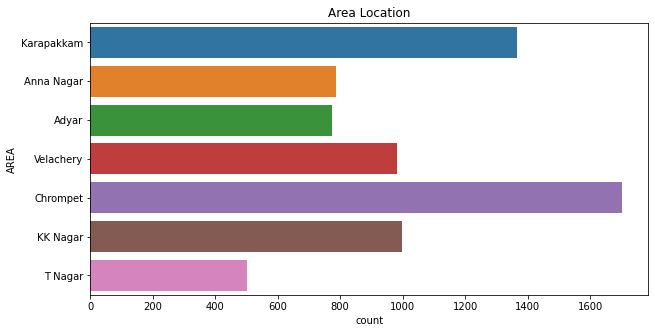

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=train,y=train['AREA'])
plt.title("Area Location")

Text(0.5, 1.0, 'Build Type')

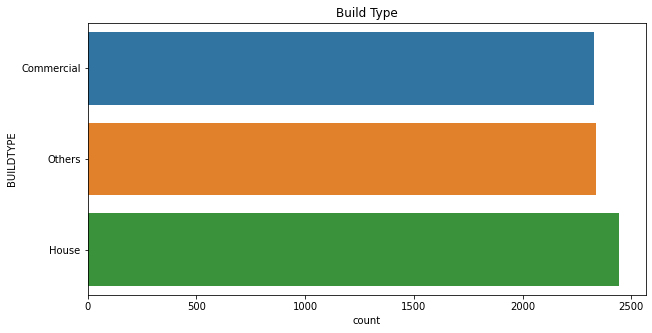

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=train,y=train['BUILDTYPE'])
plt.title("Build Type")

Text(0.5, 1.0, 'Street Type')

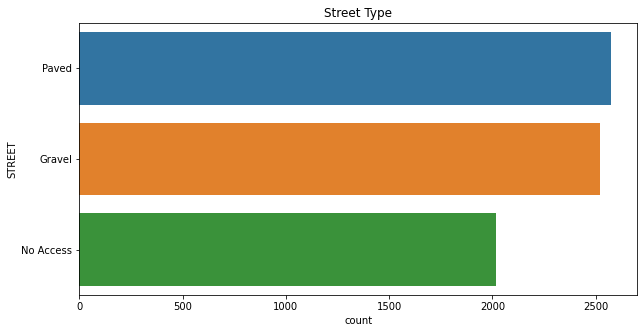

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data=train,y=train['STREET'])
plt.title("Street Type")


Text(0.5, 1.0, 'Street Type')

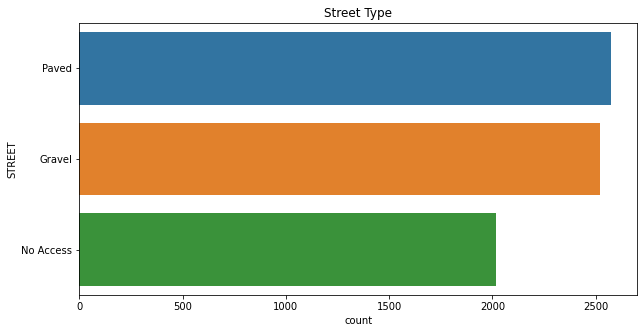

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=train,y=train['STREET'])
plt.title("Street Type")

##  Numerical Columns

In [23]:
train.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

<AxesSubplot:xlabel='INT_SQFT', ylabel='Density'>

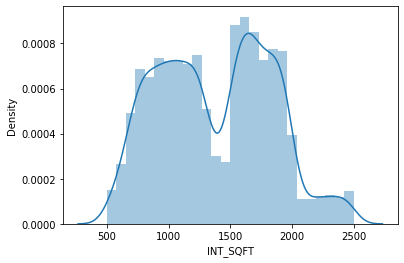

In [24]:
sns.distplot(train['INT_SQFT'])

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='Density'>

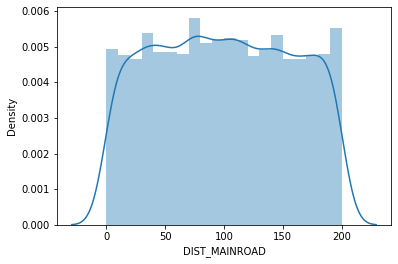

In [25]:
sns.distplot(train['DIST_MAINROAD'])

In [26]:
train['N_BEDROOM'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7109 entries, 0 to 7108
Series name: N_BEDROOM
Non-Null Count  Dtype  
--------------  -----  
7109 non-null   float64
dtypes: float64(1)
memory usage: 55.7 KB


In [27]:
train['N_BEDROOM'] = train['N_BEDROOM'].astype(int)

<AxesSubplot:xlabel='N_BEDROOM', ylabel='count'>

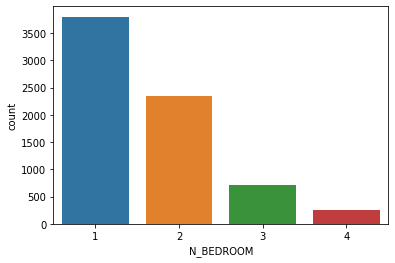

In [28]:
sns.countplot(train['N_BEDROOM'])

In [29]:
Area_Group = train.groupby(['AREA','MZZONE'])['PRT_ID'].count()
Area_Group=pd.DataFrame(Area_Group)
Area_Group.to_csv("Grouped_Area.csv")


In [30]:
train.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [31]:
train.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [32]:
train['N_BEDROOM'].value_counts()

1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

In [33]:
total_columns = train.columns

In [34]:
total_columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [35]:
import plotly.express as px

### Price Ranges in every Area

In [36]:
px.scatter(train,x='AREA',y='SALES_PRICE')

In [37]:
px.histogram(train,x='INT_SQFT',y='SALES_PRICE',color='AREA')

In [38]:
px.histogram(train,x='INT_SQFT',y='SALES_PRICE',color='AREA')


In [39]:
train['DATE_SALE']=pd.to_datetime(train['DATE_SALE'],dayfirst=True)

train['Year Sale'] = train['DATE_SALE'].dt.year


train['DATE_BUILD']=pd.to_datetime(train['DATE_BUILD'],dayfirst=True)
train['Year Build'] = train['DATE_BUILD'].dt.year



In [40]:
px.line(train,x="Year Build",y="SALES_PRICE",color='Year Build')

In [41]:
px.line(train,y="Year Sale",x="SALES_PRICE",color='Year Sale',title="Year of the Sale against Sale Price")

In [42]:
train["SALES_PRICE_LAKHS"] = round(train['SALES_PRICE']/1000000,2)

In [43]:
train["SALES_PRICE_LAKHS"]

0        7.60
1       21.72
2       13.16
3        9.63
4        7.41
        ...  
7104     5.35
7105    10.82
7106     8.35
7107     8.51
7108     9.98
Name: SALES_PRICE_LAKHS, Length: 7109, dtype: float64

In [44]:
train['N_BATHROOM']=train['N_BATHROOM'].astype(int)
train['N_BEDROOM']=train['N_BEDROOM'].astype(int)

In [45]:
#averaging data
temp =pd.DataFrame(train.groupby('N_BEDROOM')['SALES_PRICE'].mean())
temp['N_BEDROOM'] = temp.index
temp = temp.sort_values(by='SALES_PRICE',ignore_index=True)
N_BEDROOM_values = temp.N_BEDROOM.unique()

#Ploting
px.bar(temp,y='SALES_PRICE',x='N_BEDROOM',color='N_BEDROOM')

In [46]:
#averaging data
temp =pd.DataFrame(train.groupby('N_BATHROOM')['SALES_PRICE'].mean())
temp['N_BATHROOM'] = temp.index
temp = temp.sort_values(by='SALES_PRICE',ignore_index=True)
N_BATHROOM_values = temp.N_BATHROOM.unique()
#Ploting
px.bar(temp,y='SALES_PRICE',x='N_BATHROOM',color='N_BATHROOM')

In [47]:

#averaging data
temp =pd.DataFrame(train.groupby('N_ROOM')['SALES_PRICE'].mean())
temp['N_ROOM'] = temp.index
temp = temp.sort_values(by='SALES_PRICE',ignore_index=True)
N_ROOM_values = temp.N_ROOM.unique()


#Ploting
px.bar(temp,y='SALES_PRICE',x='N_ROOM',color='N_ROOM')


In [48]:
#averaging data
temp =pd.DataFrame(train.groupby('Year Build')['SALES_PRICE'].mean())
temp['Year Build'] = temp.index
temp = temp.sort_values(by='SALES_PRICE',ignore_index=True)

#Ploting
px.bar(temp,y='SALES_PRICE',x='Year Build',color='Year Build')

## Year Vs Price

In [49]:
#averaging data
temp =pd.DataFrame(train.groupby('Year Sale')['SALES_PRICE'].mean())
temp['Year Sale'] = temp.index
temp = temp.sort_values(by='SALES_PRICE',ignore_index=True)

#Ploting
px.bar(temp,y='SALES_PRICE',x='Year Sale',color='Year Sale')

## Parking Facilty Vs Price

In [50]:
#averaging data
temp =pd.DataFrame(train.groupby('PARK_FACIL')['SALES_PRICE'].mean())
temp['PARK_FACIL'] = temp.index
temp = temp.sort_values(by='SALES_PRICE',ignore_index=True)
PARK_FACIL_values = temp.PARK_FACIL.unique()

#Ploting
px.bar(temp,y='SALES_PRICE',x='PARK_FACIL',color='PARK_FACIL')



In [51]:
train.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

## Build Type Vs Price

In [52]:
#averaging data
temp =pd.DataFrame(train.groupby('BUILDTYPE')['SALES_PRICE'].mean())
temp['BUILDTYPE'] = temp.index
temp = temp.sort_values(by='SALES_PRICE',ignore_index=True)
BUILDTYPE_values = temp.BUILDTYPE.unique()

#Ploting
px.bar(temp,y='SALES_PRICE',x='BUILDTYPE',color='BUILDTYPE')

## Area Vs Price

In [53]:
temp =pd.DataFrame(train.groupby('AREA')['SALES_PRICE'].mean())
temp['AREA'] = temp.index
temp = temp.sort_values(by='SALES_PRICE')
AREA_values = temp.AREA.unique()


px.bar(temp,y='SALES_PRICE')

## Sqft Vs Price

In [55]:
#averaging data
temp =pd.DataFrame(train.groupby('INT_SQFT')['SALES_PRICE'].mean())
temp['INT_SQFT'] = temp.index
temp = temp.sort_values(by='SALES_PRICE',ignore_index=True)

#Ploting
px.histogram(temp,y='SALES_PRICE',x='INT_SQFT',nbins=25)

## Sales Condition Vs Price

In [57]:
#averaging data
temp =pd.DataFrame(train.groupby('SALE_COND')['SALES_PRICE'].mean())
temp['SALE_COND'] = temp.index
temp = temp.sort_values(by='SALES_PRICE',ignore_index=True)
SALE_COND_values = temp.SALE_COND.unique()

#Ploting
px.bar(temp,y='SALES_PRICE',x='SALE_COND',color='SALE_COND')

## Utility Availability Vs Price

In [58]:
#averaging data
temp =pd.DataFrame(train.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean())
temp['UTILITY_AVAIL'] = temp.index
temp = temp.sort_values(by='SALES_PRICE',ignore_index=True)
UTILITY_AVAIL_values = temp.UTILITY_AVAIL.unique()

#Ploting
px.bar(temp,y='SALES_PRICE',x='UTILITY_AVAIL',color='UTILITY_AVAIL')

## Street Vs Price

In [59]:
#averaging data
temp =pd.DataFrame(train.groupby('STREET')['SALES_PRICE'].mean())
temp['STREET'] = temp.index
temp = temp.sort_values(by='SALES_PRICE',ignore_index=True)
STREET_values = temp.STREET.unique()


#Ploting
px.bar(temp,y='SALES_PRICE',x='STREET',color='STREET')

## MZZone Vs Price

In [60]:
#averaging data
temp =pd.DataFrame(train.groupby('MZZONE')['SALES_PRICE'].mean())
temp['MZZONE'] = temp.index
temp = temp.sort_values(by='SALES_PRICE',ignore_index=True)


#Ploting
px.bar(temp,y='SALES_PRICE',x='MZZONE',color='MZZONE')

In [61]:
Mzzone_values = temp.MZZONE.unique()
Mzzone_values

array(['A', 'C', 'I', 'RH', 'RL', 'RM'], dtype=object)

In [62]:
train['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [63]:
train.drop(['PRT_ID','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis=1,inplace=True)

# Cleaned Csv File Export

In [64]:
train.to_csv('cleaned.csv')
print("Cleaned Data Exported sucessfuly as cleaned.csv")
print("***********************************************")

Cleaned Data Exported sucessfuly as cleaned.csv
***********************************************


# Label Encoding

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder

In [66]:
train.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'Year Sale', 'Year Build', 'SALES_PRICE_LAKHS'],
      dtype='object')

In [67]:
train['MZZONE']=train['MZZONE'].replace(to_replace=Mzzone_values,value=[1,2,3,4,5,6])

train['STREET']=train['STREET'].replace(to_replace=STREET_values,value=[1,2,3])

train['AREA']=train['AREA'].replace(to_replace=AREA_values,value=[1,2,3,4,5,6,7])

train['N_BEDROOM']=train['N_BEDROOM'].replace(to_replace=N_BEDROOM_values,value=[1,2,3,4])

train['N_BATHROOM']=train['N_BATHROOM'].replace(to_replace=N_BATHROOM_values,value=[1,2])

train['SALE_COND']=train['SALE_COND'].replace(to_replace=SALE_COND_values,value=[1,2,3,4,5])

train['PARK_FACIL']=train['PARK_FACIL'].replace(to_replace=PARK_FACIL_values,value=[1,2])

train['BUILDTYPE']=train['BUILDTYPE'].replace(to_replace=BUILDTYPE_values,value=[1,2,3])

train['UTILITY_AVAIL']=train['UTILITY_AVAIL'].replace(to_replace=UTILITY_AVAIL_values,value=[1,2,3])

Another type

#Label Encoder
for column in train.columns:
    if train[column].dtype == object:
        train[column] = le.fit_transform(train[column])


## Train,test Split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X = train.drop(['SALES_PRICE','SALES_PRICE_LAKHS','DATE_SALE','DATE_BUILD','REG_FEE','COMMIS'],axis=1)
Y = train.SALES_PRICE

In [70]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=124)

In [71]:
from sklearn import feature_selection

In [72]:
orginalfeatures = train.columns
print("Orginal Features Count : ",len(orginalfeatures))


Orginal Features Count :  20


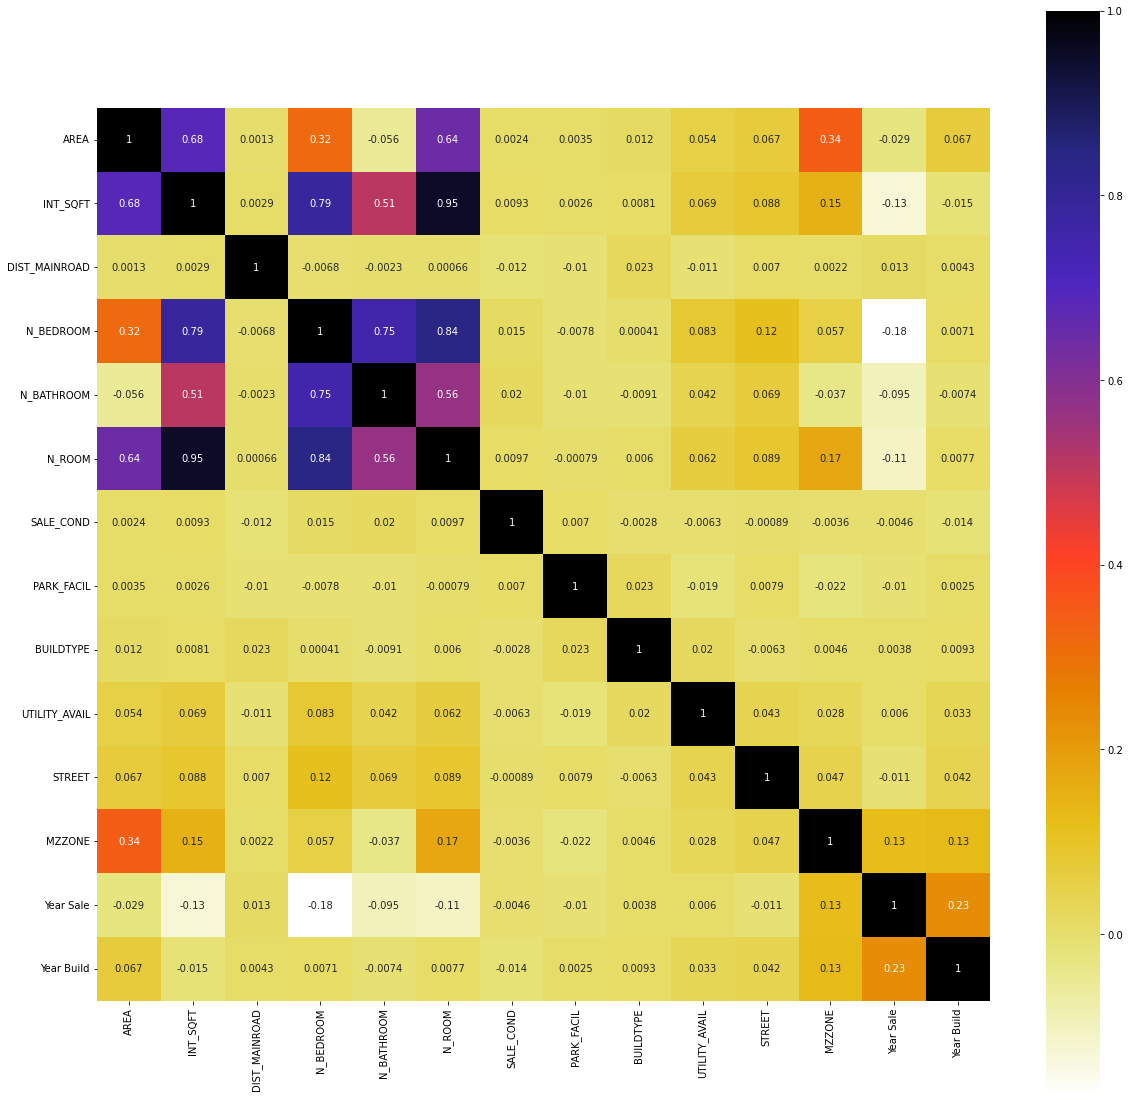

In [73]:
plt.figure(figsize=(20,20))
cor = x_train.corr()
sns.heatmap(cor,annot=True,square=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [74]:
def correlation(dataset,threshold):
    col_corr =set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr        

        
    

In [75]:
corr_features = correlation(x_test,0.9)

In [77]:
corr_features

{'N_ROOM'}

In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression

In [79]:
x_train

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,Year Sale,Year Build
3169,2,968,27,1,1,3,3,2,3,3,2,6,2007,1979
3591,7,1695,194,1,1,4,5,2,1,2,3,4,2006,1984
2400,2,1159,140,1,1,3,4,2,1,3,3,5,2008,1968
3281,5,1350,63,2,1,4,2,2,3,2,2,6,2011,1992
4814,6,1536,191,1,1,4,2,1,2,2,3,5,2014,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,4,1845,45,3,2,5,1,2,2,2,3,4,2005,1982
135,3,711,116,1,1,2,5,2,2,2,1,5,2014,2002
6161,2,1150,170,1,1,3,2,1,3,1,1,3,2011,1999
4764,6,1956,64,2,1,5,5,1,2,2,2,5,2011,1983


In [80]:
sel = SelectKBest(r_regression,k=2)

# Machine Learning Models

## Lasso Regression 

In [81]:
from sklearn.linear_model import Lasso

In [82]:
#fitting the model
lasso = Lasso()
lasso.fit(x_train,y_train)


#predicting the model
ypred = lasso.predict(x_test)
lasso_score = lasso.score(x_test,y_test)*100
print("Lasso Regression score is ",lasso_score)






Lasso Regression score is  88.33949930894848


# LInear Regression

In [83]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

#predicting

ypred = lr.predict(x_test)
lr.score(x_test,y_test)*100

88.33950357033696

## Ridge Regression

In [84]:
from sklearn.linear_model import Ridge

In [85]:
ridge = Ridge()
ridge.fit(x_train,y_train)


#predicting the model
ypred = ridge.predict(x_test)
ridge_score = ridge.score(x_test,y_test)*100
print("Ridge Regression score is ",ridge_score)


Ridge Regression score is  88.33970033544645


## DecisionTreeRegressor

In [86]:
from sklearn.tree import DecisionTreeRegressor


In [87]:
#fitting the model
decisiontree = DecisionTreeRegressor()
decisiontree.fit(x_train,y_train)

#predicting 
decisiontree_score = decisiontree.score(x_test,y_test)*100
print("Decision Tree score is",decisiontree_score)




Decision Tree score is 97.03086842310724


## RandomForest

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
#Fitting the model
randomforest = RandomForestRegressor(max_depth=16,n_estimators=180,random_state=15)
randomforest.fit(x_train,y_train)

ypred = randomforest.predict(x_test)
randomforestscore = randomforest.score(x_test,y_test)*100
print("Random Forest Square is  :",randomforestscore)

Random Forest Square is  : 98.8021367864969


# Gradient Booster

In [90]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

#fitting the model
GradientBoosting = GradientBoostingRegressor()
GradientBoosting.fit(x_train,y_train)

#predicting the model
GradientBoosting_score = GradientBoosting.score(x_test,y_test)*100
GradientBoosting_score

99.09868917508471

## AdaBoost

In [91]:
from sklearn.ensemble import AdaBoostRegressor

In [92]:
#fitting the model
adaboost = AdaBoostRegressor(random_state=15,n_estimators=130)
adaboost.fit(x_train,y_train)

#predicting the model
adaboostscore = adaboost.score(x_test,y_test)*100
adaboostscore

92.95684459502381

# Model Scores

In [93]:
print("Lasso Regression score is ",lasso_score)
print("Ridge Regression score is ",ridge_score)
print("Decision Tree score is ",decisiontree_score)
print("RandomForest Regression score is ",randomforestscore)
print("Adaboost Regression score is ",adaboostscore)
print("Gradient Boost Regression score is ",GradientBoosting_score)

Lasso Regression score is  88.33949930894848
Ridge Regression score is  88.33970033544645
Decision Tree score is  97.03086842310724
RandomForest Regression score is  98.8021367864969
Adaboost Regression score is  92.95684459502381
Gradient Boost Regression score is  99.09868917508471


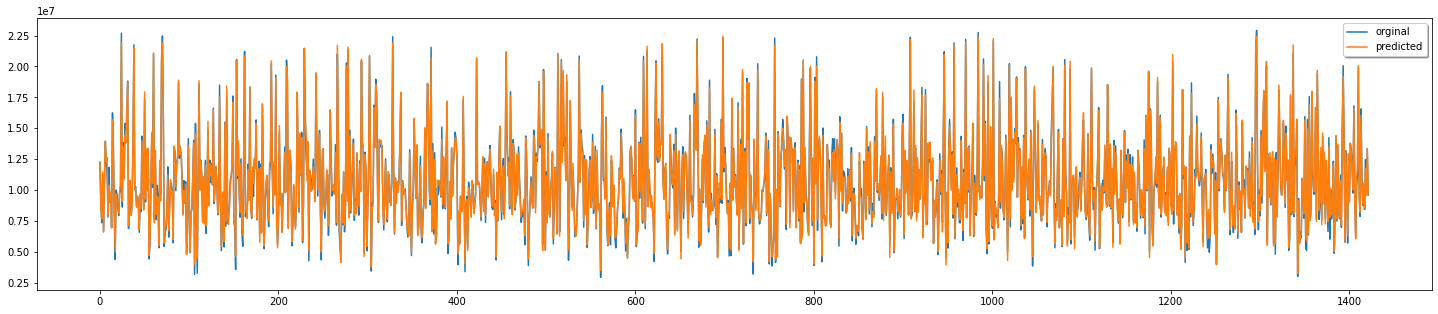

In [94]:
## Ploting the randomforest
plt.figure(figsize=(25,5))
x_ax = range(len(y_test))
plt.plot(x_ax,y_test,label='orginal')
plt.plot(x_ax,ypred,label='predicted')
plt.legend(loc='best',fancybox=True,shadow=True)
#plt.grid(True)
plt.show()

In [95]:
x_train

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,Year Sale,Year Build
3169,2,968,27,1,1,3,3,2,3,3,2,6,2007,1979
3591,7,1695,194,1,1,4,5,2,1,2,3,4,2006,1984
2400,2,1159,140,1,1,3,4,2,1,3,3,5,2008,1968
3281,5,1350,63,2,1,4,2,2,3,2,2,6,2011,1992
4814,6,1536,191,1,1,4,2,1,2,2,3,5,2014,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,4,1845,45,3,2,5,1,2,2,2,3,4,2005,1982
135,3,711,116,1,1,2,5,2,2,2,1,5,2014,2002
6161,2,1150,170,1,1,3,2,1,3,1,1,3,2011,1999
4764,6,1956,64,2,1,5,5,1,2,2,2,5,2011,1983


In [96]:
#Feature importance
feature_scores = pd.Series(randomforest.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores=feature_scores*100
feature_scores



AREA             47.409561
BUILDTYPE        33.157000
INT_SQFT         11.063281
MZZONE            3.756751
PARK_FACIL        1.525159
STREET            1.049444
Year Build        0.481964
N_ROOM            0.415392
DIST_MAINROAD     0.249568
N_BATHROOM        0.239732
SALE_COND         0.239726
N_BEDROOM         0.181135
Year Sale         0.140900
UTILITY_AVAIL     0.090389
dtype: float64

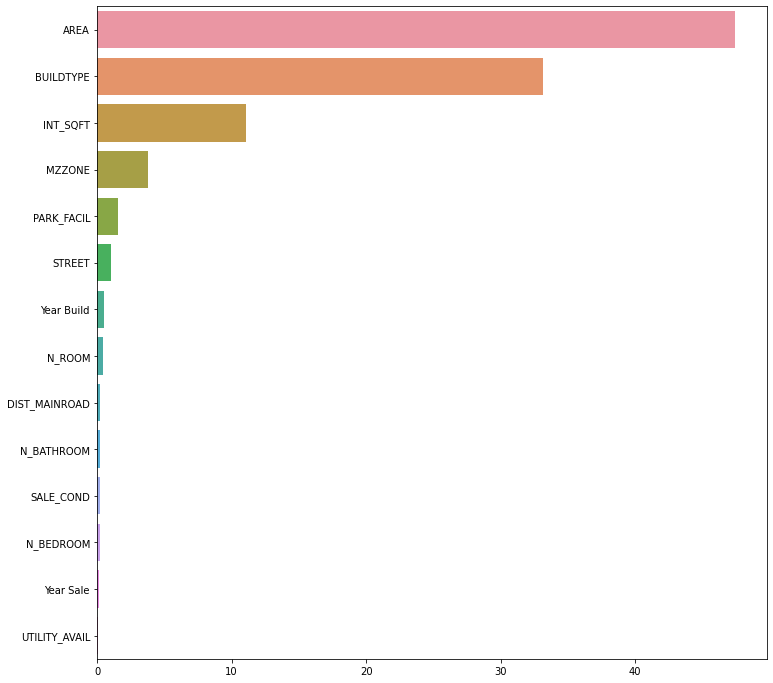

In [97]:
plt.figure(figsize=(12,12))
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.show()

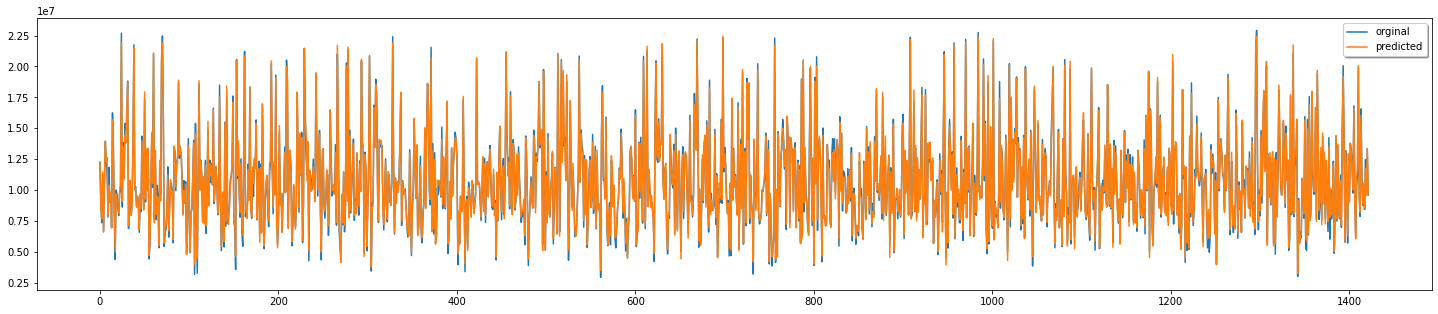

In [98]:
plt.figure(figsize=(25,5))
x_ax = range(len(y_test))
plt.plot(x_ax,y_test,label='orginal')
plt.plot(x_ax,ypred,label='predicted')
plt.legend(loc='best',fancybox=True,shadow=True)
#plt.grid(True)
plt.show()

In [99]:
feature_scores

AREA             47.409561
BUILDTYPE        33.157000
INT_SQFT         11.063281
MZZONE            3.756751
PARK_FACIL        1.525159
STREET            1.049444
Year Build        0.481964
N_ROOM            0.415392
DIST_MAINROAD     0.249568
N_BATHROOM        0.239732
SALE_COND         0.239726
N_BEDROOM         0.181135
Year Sale         0.140900
UTILITY_AVAIL     0.090389
dtype: float64

In [100]:
main_features = feature_scores.loc[feature_scores > 0]
main_features 

AREA             47.409561
BUILDTYPE        33.157000
INT_SQFT         11.063281
MZZONE            3.756751
PARK_FACIL        1.525159
STREET            1.049444
Year Build        0.481964
N_ROOM            0.415392
DIST_MAINROAD     0.249568
N_BATHROOM        0.239732
SALE_COND         0.239726
N_BEDROOM         0.181135
Year Sale         0.140900
UTILITY_AVAIL     0.090389
dtype: float64

In [101]:
train.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'Year Sale', 'Year Build', 'SALES_PRICE_LAKHS'],
      dtype='object')

In [102]:
main_features = ['AREA','INT_SQFT','N_BEDROOM','PARK_FACIL','MZZONE','BUILDTYPE','STREET']


In [103]:
X = train[main_features]


In [104]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=15)

# Finalized Model

In [105]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

#fitting the model
GradientBoosting = GradientBoostingRegressor()
GradientBoosting.fit(x_train,y_train)

#predicting the model
GradientBoosting_score = GradientBoosting.score(x_test,y_test)*100
GradientBoosting_score

98.68264932247797

In [106]:
GradientBoosting.predict([[659,1,3,4,1,2,2]])

array([9139027.38244865])

In [107]:
#Currency Conversion
from babel.numbers import format_currency

In [108]:
valu=GradientBoosting.predict([[1500,1,2,3,2,1,2]])
low=int(valu-(valu*0.01))
low = format_currency(low, 'INR', locale='en_IN')



high=int(valu+(valu*0.01))
high = format_currency(high, 'INR', locale='en_IN')
print('Estimated value is:',low , 'to', high)

Estimated value is: ₹91,04,533.00 to ₹92,88,463.00


# Data Export 

In [109]:
import pickle


#Writing Pickle File
with open('model_pkl','wb') as f:
    pickle.dump(GradientBoosting,f)
    print("Model Saved Successfuly as model_pkl")
    print("************************************")


#Thank You Eda completed by Immanuel


Model Saved Successfuly as model_pkl
************************************
